# <center> Intern Assignment - HealthKart</center>

# Context

HealthKart runs influencer campaigns across various social platforms (Instagram, YouTube, Twitter, etc.) to
promote different products across multiple brands (e.g., MuscleBlaze, HKVitals, Gritzo). Influencers may be paid
per post or per order. You are expected to build a dashboard that shows:
- Campaign performance
- Incremental ROAS (Return on Ad Spend)
- Influencer insights
- Payout tracking

# Objective

Build an open-source tool or dashboard that can track and visualize the ROI of influencer campaigns

In [1]:
# Downloading "Faker" package to generate fake but realistic data for simulation.

# !pip install faker
# import warnings;
# warnings.filterwarnings('ignore');

# 1) Data Modeling

In [2]:
# Importing required libraries

import pandas as pd

import numpy as np

from faker import Faker

import random

from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid')

import warnings;
warnings.filterwarnings('ignore');

### a) Simulating "Influencers" dataset, influencers: ID, name, category, gender, follower count, platform

In [3]:
# Creating Influencer dataset

#Note: To keep the dataset a lot more realistic, choosing to simulate Indian names instead of American names
fake = Faker("en_IN")

# Influencer dataset
platforms = ['Instagram', 'YouTube', 'Twitter']
categories = ['Fitness', 'Nutrition', 'Wellness']
genders = ['Male', 'Female', 'Other']

influencers = []
for i in range(50):
    influencers.append({
        'influencer_id': f'I{i+1:03}',
        'name': fake.name(),
        'category': random.choice(categories),
        'gender': random.choice(genders),
        'follower_count': random.randint(10000, 500000),
        'platform': random.choice(platforms)})

df_influencers = pd.DataFrame(influencers)
df_influencers.to_csv('influencers.csv', index=False)
df_influencers.head()


,influencer_id,name,category,gender,follower_count,platform
0,I001,Bhavani Bir,Wellness,Other,209007,Instagram
1,I002,Amruta Bhasin,Nutrition,Male,304632,YouTube
2,I003,Kalpit Wable,Nutrition,Female,137100,Instagram
3,I004,Udant Chaudhari,Wellness,Female,468600,Twitter
4,I005,Samaksh Kala,Fitness,Other,472219,YouTube


### b) Simulating "Posts" dataset, posts: influencer_id, platform, date, URL, caption, reach, likes, comments 

In [4]:
# Creating Posts dataset

# Posts dataset
posts = []
for i in range(200):
    influencer = random.choice(influencers)
    date = fake.date_between(start_date='-3M', end_date='today')
    posts.append({
        'influencer_id': influencer['influencer_id'],
        'platform': influencer['platform'],
        'date': date,
        'URL': fake.url(),
        'caption': fake.sentence(),
        'reach': random.randint(1000, 500000),
        'likes': random.randint(100, 20000),
        'comments': random.randint(10, 1000)})

df_posts = pd.DataFrame(posts)
df_posts.to_csv('posts.csv', index=False)
df_posts.head()


,influencer_id,platform,date,URL,caption,reach,likes,comments
0,I009,YouTube,2025-07-04,https://saxena-prabhu.com/,Reiciendis nam id veniam ex dolores quis.,174029,3551,74
1,I037,YouTube,2025-06-01,https://kant-bose.com/,Animi porro aperiam assumenda qui atque.,247450,17061,476
2,I022,Instagram,2025-07-19,http://www.sehgal.net/,Nemo earum alias debitis.,227718,18223,220
3,I043,YouTube,2025-06-15,http://www.raj.com/,Laudantium enim ipsum ratione omnis ut quis.,186759,16929,953
4,I036,Instagram,2025-05-26,http://www.radhakrishnan.com/,Modi accusantium occaecati explicabo rem.,363424,11097,775


### c) Simulating "Tracking_data" dataset,  tracking_data: source, campaign, influencer_id, user_id, product, date, orders, revenue

In [5]:
# Creating Tracking dataset

# Tracking dataset
products = ['MB Whey', 'HK Omega3', 'Gritzo Shake']
tracking = []

for i in range(500):
    influencer = random.choice(influencers)
    campaign = f'Campaign_{random.randint(1,5)}'
    user_id = f'U{random.randint(1, 1000)}'
    product = random.choice(products)
    date = fake.date_between(start_date='-2M', end_date='today')
    orders = random.randint(1, 5)
    revenue = orders * random.uniform(500, 1500)
    
    tracking.append({
        'source': 'influencer',
        'campaign': campaign,
        'influencer_id': influencer['influencer_id'],
        'user_id': user_id,
        'product': product,
        'date': date,
        'orders': orders,
        'revenue': round(revenue, 2)})

df_tracking = pd.DataFrame(tracking)
df_tracking.to_csv('tracking_data.csv', index=False)
df_tracking.head()


,source,campaign,influencer_id,user_id,product,date,orders,revenue
0,influencer,Campaign_1,I045,U400,HK Omega3,2025-06-18,4,3145.72
1,influencer,Campaign_2,I040,U922,HK Omega3,2025-06-28,5,7145.13
2,influencer,Campaign_3,I018,U810,HK Omega3,2025-06-15,3,2256.99
3,influencer,Campaign_5,I042,U938,Gritzo Shake,2025-05-27,2,1419.12
4,influencer,Campaign_3,I042,U354,Gritzo Shake,2025-06-17,3,3319.94


In [6]:
df_tracking['product'].unique()

array(['HK Omega3', 'Gritzo Shake', 'MB Whey'], dtype=object)

### d) Simulating Payouts dataset, payouts: influencer_id, basis (post/order), rate, orders, total_payout

In [7]:
# Creating Payouts dataset

# Payouts dataset
payouts = []
for influencer in influencers:
    basis = random.choice(['post', 'order'])
    rate = random.randint(1000, 8000)
    orders = random.randint(10, 50)
    payout = orders * rate if basis == 'order' else rate * random.randint(1, 10)
    payouts.append({
        'influencer_id': influencer['influencer_id'],
        'basis': basis,
        'rate': rate,
        'orders': orders,
        'total_payout': payout})

df_payouts = pd.DataFrame(payouts)
df_payouts.to_csv('payouts.csv', index=False)
df_payouts.head()


,influencer_id,basis,rate,orders,total_payout
0,I001,order,3479,43,149597
1,I002,post,3458,34,20748
2,I003,post,3563,46,21378
3,I004,post,6760,42,20280
4,I005,order,6426,18,115668


# 2) Features to Build

### a) Uploading or ingesting influencer campaign data

In [8]:
# Load data

df_influencers = pd.read_csv('influencers.csv')
df_posts = pd.read_csv('posts.csv')
df_tracking = pd.read_csv('tracking_data.csv')
df_payouts = pd.read_csv('payouts.csv')

### b) Tracking performance of posts and influencers

In [9]:
# Total performance by influencer

performance = df_tracking.groupby('influencer_id').agg({'orders': 'sum', 'revenue': 'sum'}).reset_index()

performance = performance.merge(df_payouts[['influencer_id', 'total_payout']], on='influencer_id')
performance['ROAS'] = performance['revenue'] / performance['total_payout']
performance = performance.merge(df_influencers, on='influencer_id')

performance.sort_values(by='ROAS', ascending=False).head(10)

,influencer_id,orders,revenue,total_payout,ROAS,name,category,gender,follower_count,platform
44,I045,30,31706.07,4454,7.118561,Damini Dhar,Wellness,Male,411705,Twitter
6,I007,44,39761.49,6822,5.828421,Vrishti Chaudry,Wellness,Male,388877,Twitter
12,I013,33,30342.43,6031,5.031078,Nihal Pau,Wellness,Female,337317,YouTube
37,I038,27,30661.95,6948,4.413061,Lekha Luthra,Nutrition,Male,216446,YouTube
39,I040,61,67908.69,15768,4.306741,Harshil Kulkarni,Wellness,Female,449341,YouTube
25,I026,52,50237.74,14384,3.492613,Deepa Golla,Nutrition,Male,423117,Instagram
36,I037,34,32307.37,11150,2.897522,Falak Bir,Nutrition,Male,64757,YouTube
42,I043,30,26131.57,9314,2.805623,Zayyan Goda,Nutrition,Female,441407,YouTube
15,I016,26,26723.24,9586,2.787736,Advaith Comar,Nutrition,Female,435909,YouTube
38,I039,27,28114.15,10509,2.675245,Yochana Bhavsar,Nutrition,Other,340150,Instagram


### c) ROI and incremental ROAS calculation

In [11]:
# ROI = (Revenue - Cost) / Cost
performance['ROI'] = (performance['revenue'] - performance['total_payout']) / performance['total_payout']

# Simulating Incremental Revenue (assuming 30% of revenue is incremental)
performance['incremental_revenue'] = performance['revenue'] * 0.30

# Incremental ROAS = Incremental Revenue / Cost
performance['incremental_ROAS'] = performance['incremental_revenue'] / performance['total_payout']

In [25]:
performance[['influencer_id', 'name', 'total_payout', 'revenue', 'incremental_revenue', 'ROI', 'ROAS', 'incremental_ROAS']].head()

,influencer_id,name,total_payout,revenue,incremental_revenue,ROI,ROAS,incremental_ROAS
0,I001,Bhavani Bir,149597,26934.32,8080.296,-0.819954,0.180046,0.054014
1,I002,Amruta Bhasin,20748,26333.29,7899.987,0.269197,1.269197,0.380759
2,I003,Kalpit Wable,21378,40727.23,12218.169,0.905100,1.905100,0.571530
3,I004,Udant Chaudhari,20280,22282.19,6684.657,0.098727,1.098727,0.329618
4,I005,Samaksh Kala,115668,26405.40,7921.620,-0.771714,0.228286,0.068486


### d) Filtering by brand, product, influencer type, platform

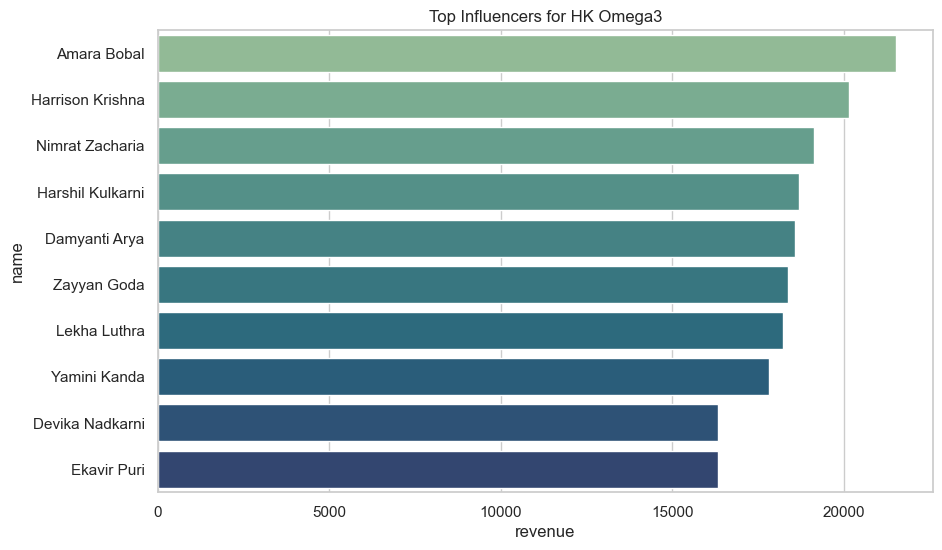

In [54]:
# For Example let's consider "Nutrition" category, "Instagram" Platform,'HK Omega3' as Product

filtered = performance[(performance['category'] == 'Nutrition') & (performance['platform'] == 'Instagram')]

top_product = df_tracking[df_tracking['product'] == 'HK Omega3']
top_product = top_product.groupby('influencer_id')['revenue'].sum().reset_index()
top_product = top_product.merge(df_influencers[['influencer_id', 'name']], on='influencer_id')

plt.figure(figsize=(10,6))
sns.barplot(data=top_product.sort_values(by='revenue', ascending=False).head(10), x='revenue', y='name', palette='crest')
plt.title("Top Influencers for HK Omega3")
plt.savefig('plot_2', dpi=300)
plt.show()

 **Note:** You can apply filters as you wish, leaving a few more interesting combinations below

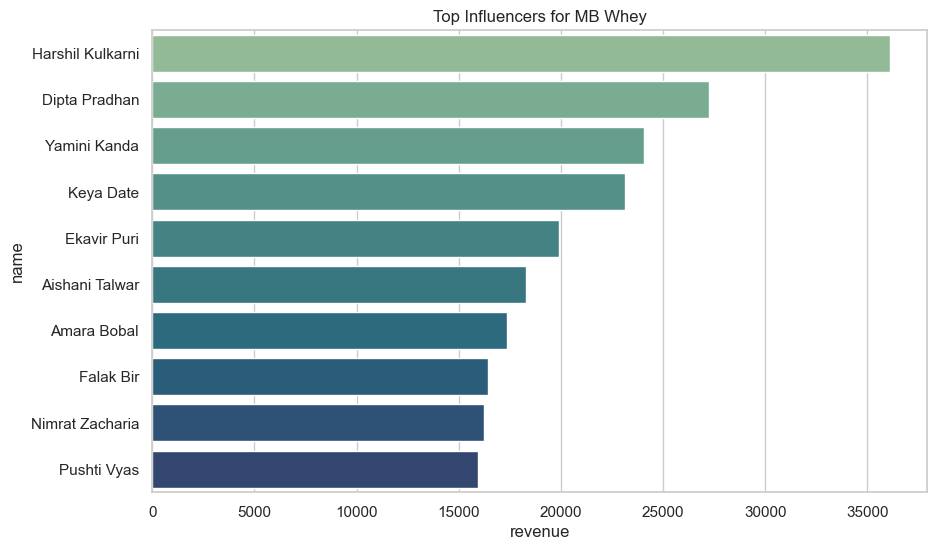

In [53]:
# For Example let's consider "Wellness" category, "Instagram" Platform,'MB Whey' as Product

filtered = performance[(performance['category'] == 'Wellness') & (performance['platform'] == 'Instagram')]

top_product = df_tracking[df_tracking['product'] == 'MB Whey']
top_product = top_product.groupby('influencer_id')['revenue'].sum().reset_index()
top_product = top_product.merge(df_influencers[['influencer_id', 'name']], on='influencer_id')

plt.figure(figsize=(10,6))
sns.barplot(data=top_product.sort_values(by='revenue', ascending=False).head(10), x='revenue', y='name', palette='crest')
plt.title("Top Influencers for MB Whey")
plt.savefig('plot_1.png', dpi=300)
plt.show()

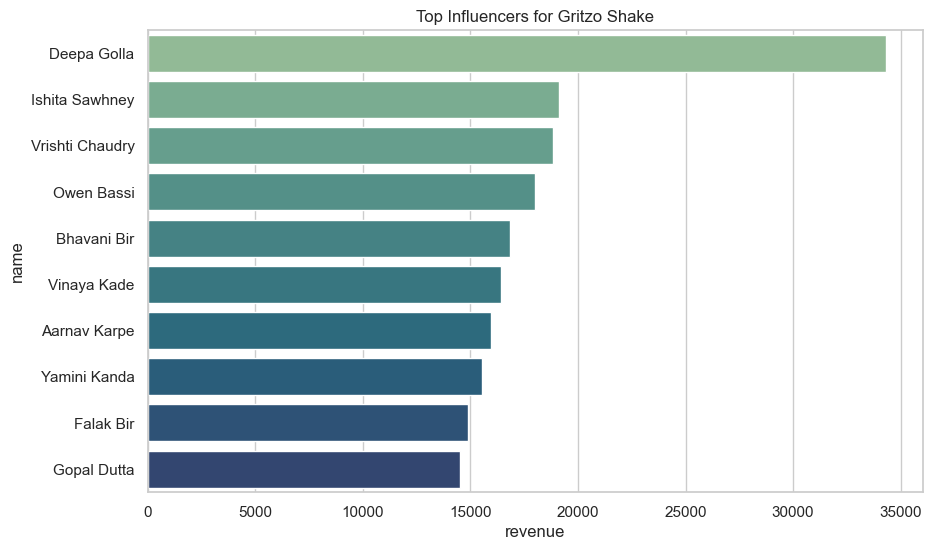

In [55]:
# For Example let's consider "Fitness" category, "YouTube" Platform,'Gritzo Shake' as Product

filtered = performance[(performance['category'] == 'Fitness') & (performance['platform'] == 'YouTube')]

top_product = df_tracking[df_tracking['product'] == 'Gritzo Shake']
top_product = top_product.groupby('influencer_id')['revenue'].sum().reset_index()
top_product = top_product.merge(df_influencers[['influencer_id', 'name']], on='influencer_id')

plt.figure(figsize=(10,6))
sns.barplot(data=top_product.sort_values(by='revenue', ascending=False).head(10), x='revenue', y='name', palette='crest')
plt.title("Top Influencers for Gritzo Shake")
plt.savefig('plot_3', dpi=300)
plt.show()

### e) Insights like: top influencers, best personas, poor ROIs

In [16]:
# Top 10 Influencers by Revenue

top_revenue = performance.sort_values(by='revenue', ascending=False)[['name', 'revenue']].head(10)
top_revenue

,name,revenue
39,Harshil Kulkarni,67908.69
26,Yamini Kanda,57449.99
25,Deepa Golla,50237.74
13,Devika Nadkarni,42367.61
28,Keya Date,42064.30
40,Amara Bobal,41957.21
2,Kalpit Wable,40727.23
11,Dipta Pradhan,40188.30
6,Vrishti Chaudry,39761.49
10,Aarnav Karpe,39277.95


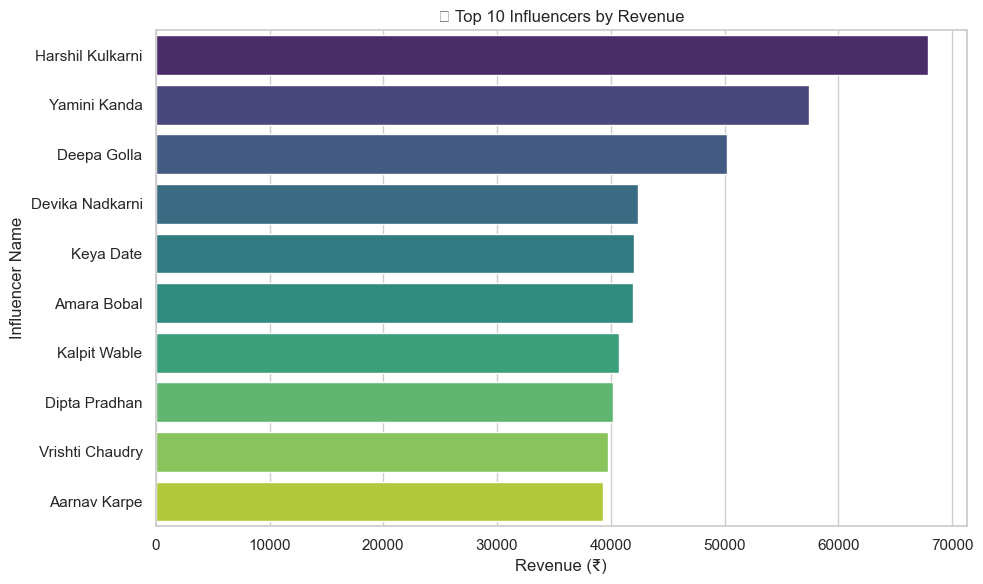

In [56]:
# Visualization of Top 10 Influencers by Revenue

plt.figure(figsize=(10,6))
sns.barplot(data=top_revenue, x='revenue', y='name', palette='viridis')
plt.title("🔝 Top 10 Influencers by Revenue")
plt.xlabel("Revenue (₹)")
plt.ylabel("Influencer Name")
plt.tight_layout()
plt.savefig('plot_4', dpi=300)
plt.show()

In [18]:
# Top Influencers by ROI

performance.sort_values(by='ROI', ascending=False)[['name', 'ROI']].head(10)

,name,ROI
44,Damini Dhar,6.118561
6,Vrishti Chaudry,4.828421
12,Nihal Pau,4.031078
37,Lekha Luthra,3.413061
39,Harshil Kulkarni,3.306741
25,Deepa Golla,2.492613
36,Falak Bir,1.897522
42,Zayyan Goda,1.805623
15,Advaith Comar,1.787736
38,Yochana Bhavsar,1.675245


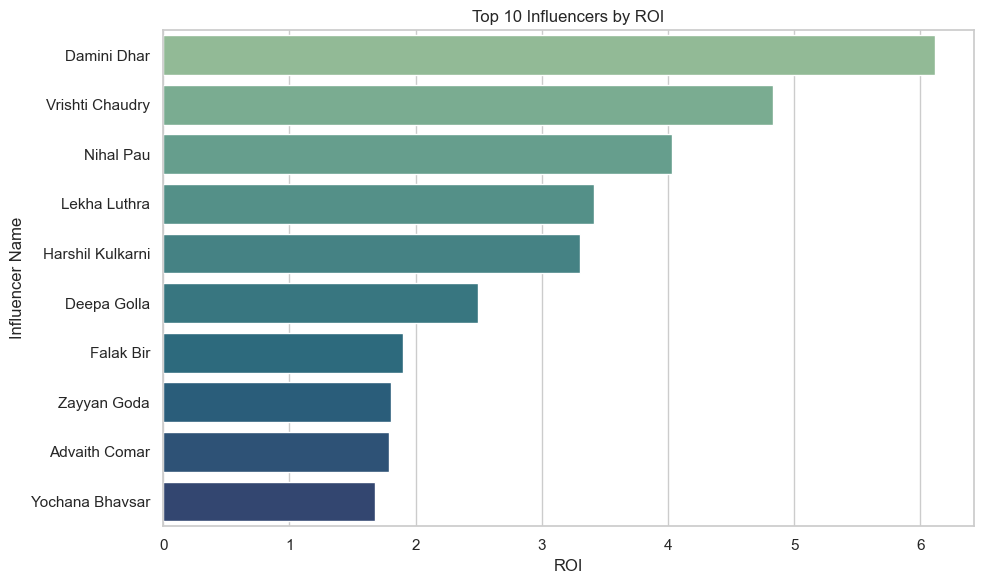

In [57]:
top_10_roi = performance.sort_values(by='ROI', ascending=False)[['name', 'ROI']].head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_roi, x='ROI', y='name', palette='crest')
plt.title("Top 10 Influencers by ROI")
plt.xlabel("ROI")
plt.ylabel("Influencer Name")
plt.tight_layout()
plt.savefig('plot_5', dpi=300)
plt.show()

In [20]:
# Best Personas (Gender/Category/Platform combinations)

persona = performance.groupby(['gender', 'category', 'platform']).agg({'revenue': 'sum', 'total_payout': 'sum'}).reset_index()

persona['ROAS'] = persona['revenue'] / persona['total_payout']
persona.sort_values(by='ROAS', ascending=False).head(10)

,gender,category,platform,revenue,total_payout,ROAS
15,Male,Wellness,Twitter,71467.56,11276,6.338024
19,Other,Nutrition,Instagram,28114.15,10509,2.675245
22,Other,Wellness,Twitter,15349.61,5874,2.613144
9,Male,Fitness,Twitter,41957.21,17790,2.358472
13,Male,Nutrition,YouTube,89302.61,38846,2.298888
3,Female,Nutrition,Instagram,40727.23,21378,1.905100
7,Female,Wellness,YouTube,133495.76,84679,1.576492
5,Female,Nutrition,YouTube,76403.47,52150,1.465071
23,Other,Wellness,YouTube,41233.97,47544,0.867280
12,Male,Nutrition,Twitter,105226.75,145610,0.722662


In [21]:
# Poor efficiency / Ineffective Campaigns (ROAS)

poor_roas = performance[performance['ROAS'] < 1].sort_values(by='ROAS')
poor_roas.head()

,influencer_id,orders,revenue,total_payout,ROAS,name,category,gender,follower_count,platform,ROI,incremental_revenue,incremental_ROAS
10,I011,41,39277.95,388800,0.101024,Aarnav Karpe,Nutrition,Other,403711,YouTube,-0.898976,11783.385,0.030307
29,I030,14,12629.53,116928,0.108011,Faras Dass,Nutrition,Female,197687,Twitter,-0.891989,3788.859,0.032403
49,I050,15,12599.59,114240,0.110291,Charita Mody,Wellness,Male,497032,Instagram,-0.889709,3779.877,0.033087
14,I015,31,30376.00,246168,0.123395,Aishani Talwar,Fitness,Female,260137,YouTube,-0.876605,9112.800,0.037019
48,I049,13,13939.73,99576,0.139991,Vinaya Patil,Nutrition,Female,166090,Twitter,-0.860009,4181.919,0.041997


In [22]:
# Poor profitability (ROI)

poor_roi = performance[performance['ROI'] < 0].sort_values(by='ROI')
poor_roi.head()

,influencer_id,orders,revenue,total_payout,ROAS,name,category,gender,follower_count,platform,ROI,incremental_revenue,incremental_ROAS
10,I011,41,39277.95,388800,0.101024,Aarnav Karpe,Nutrition,Other,403711,YouTube,-0.898976,11783.385,0.030307
29,I030,14,12629.53,116928,0.108011,Faras Dass,Nutrition,Female,197687,Twitter,-0.891989,3788.859,0.032403
49,I050,15,12599.59,114240,0.110291,Charita Mody,Wellness,Male,497032,Instagram,-0.889709,3779.877,0.033087
14,I015,31,30376.00,246168,0.123395,Aishani Talwar,Fitness,Female,260137,YouTube,-0.876605,9112.800,0.037019
48,I049,13,13939.73,99576,0.139991,Vinaya Patil,Nutrition,Female,166090,Twitter,-0.860009,4181.919,0.041997


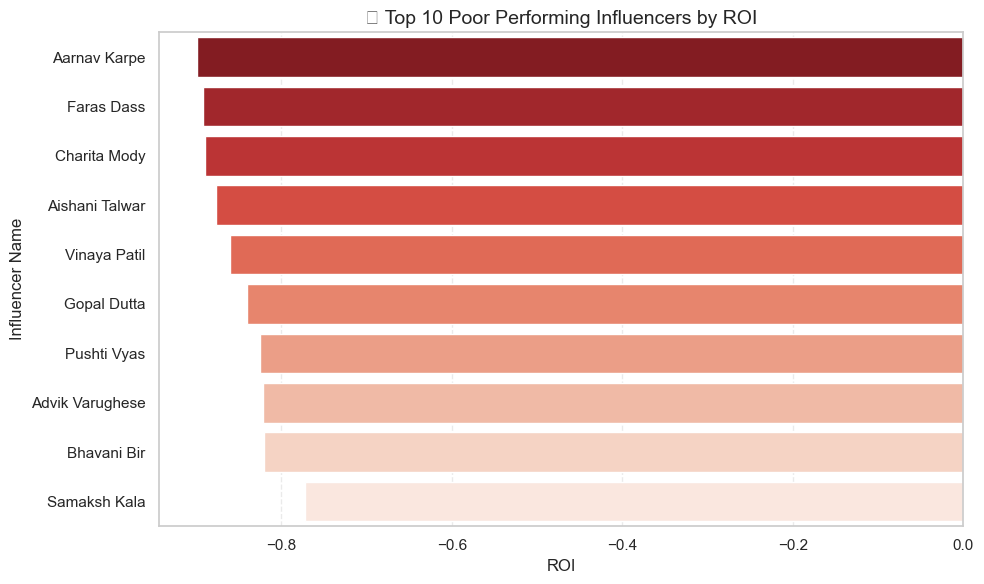

In [64]:
# Get bottom 10 influencers by ROI
top_poor_roi = poor_roi[['name', 'ROI']].head(10)

# Set up the plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_poor_roi, x='ROI', y='name', palette='Reds_r')

# Title and labels
plt.title("🚫 Top 10 Poor Performing Influencers by ROI", fontsize=14)
plt.xlabel("ROI")
plt.ylabel("Influencer Name")

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.savefig('plott', dpi=300)
plt.show()

## Other Important Insights

### Revenue Contribution by each Platform

In [28]:
# Platform-wise Revenue

rev_platform = performance.groupby('platform')['revenue'].sum().sort_values(ascending=False)

In [29]:
rev_platform

platform
YouTube      598125.13
Twitter      477665.02
Instagram    427204.70
Name: revenue, dtype: float64

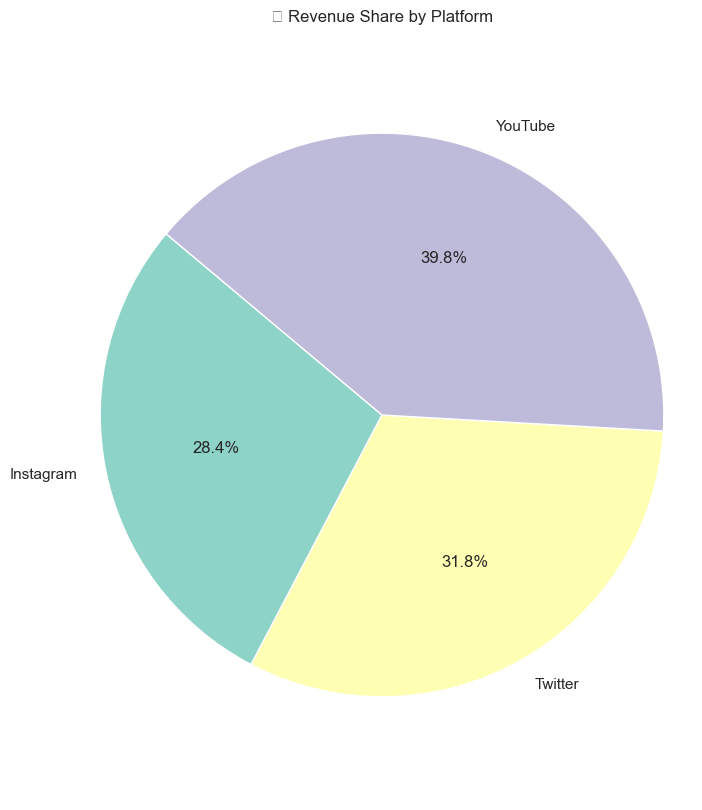

In [58]:
# Visualizing Revenue by Platform
rev_by_platform = performance.groupby('platform')['revenue'].sum()

# Plot
plt.figure(figsize=(8,10))
plt.pie(rev_by_platform, labels=rev_by_platform.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("💰 Revenue Share by Platform")
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.savefig('plot_6', dpi=300)
plt.show()

- This shows the share of total revenue generated via influencer campaigns by platform.

- So for every INR 100 earned:
a) INR 39.8 came from YouTube influencers
b) INR 31.8 came from Twitter influencers
c) INR 28.4 came from Instagram influencers

- YouTube has the Highest gross revenue share (nearly 40%). Likely better for long-form content, demos, product storytelling. Indicates strong purchase intent from YouTube audience.
- The best bet is to double down on high-performing YouTube influencers.
- 31.8% revenue share is high given Twitter's low engagement in India. May indicate high CTR (Click-Through Rate) from link-sharing posts.
- Investigate Twitter's high revenue, is it due to few power influencers or good targeting?
- Despite being the most popular influencer platform, it's contributing only 28.4%. Possibly due to low conversion, non-clickable links, or high saturation. If payouts are high, this platform may show poor ROI. Evaluate Instagram campaigns carefully; high visibility doesn't always translate to sales.

- Prioritize YouTube for next major campaign, especially for high-AOV (average order value) products.

- Audit Twitter influencers for cost vs contribution, could be a hidden ROI gem.

- Test alternative formats or influencer types on Instagram, or lower the budget unless ROAS improves.

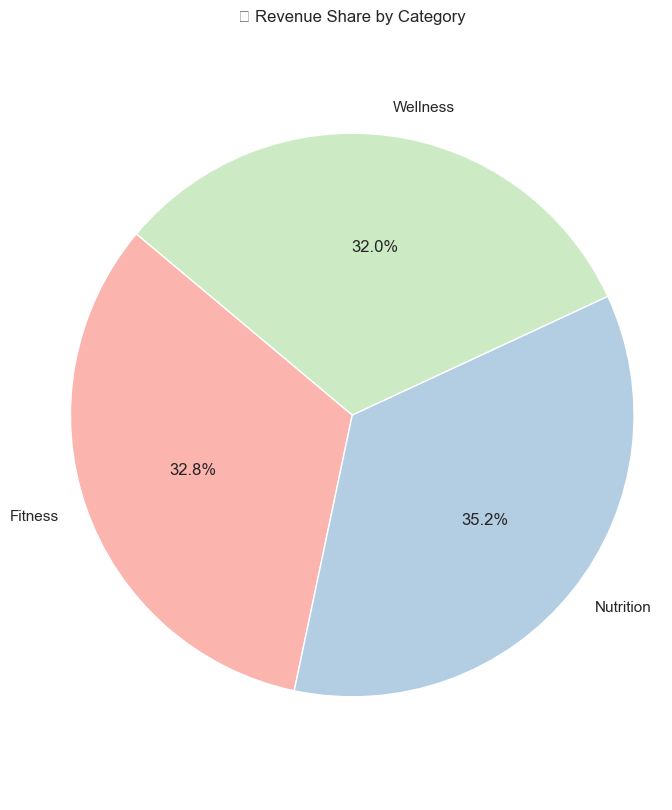

In [59]:
# Revenue by category
rev_by_category = performance.groupby('category')['revenue'].sum()

# Plot
plt.figure(figsize=(8,10))
plt.pie(rev_by_category, labels=rev_by_category.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("📦 Revenue Share by Category")
plt.axis('equal')
plt.savefig('plot_7', dpi=300)
plt.show()

- The revenue distribution is evenly spread across categories. Indicates HealthKart’s influencer strategy is well-balanced, not overly dependent on one product line. Campaign design shows good diversification across product verticals.
- Nutrition with 35.2% contribution, slightly higher than the rest suggests larger influencer pool, higher ticket size per product or better audience-product fit.
- Wellness is slightly behind(32%), the difference is not higher but worth exploring things like:
  a) Are the payouts too high for wellness influencers?
  b) Does wellness have lower conversion rate?

### Revenue Trends over Time

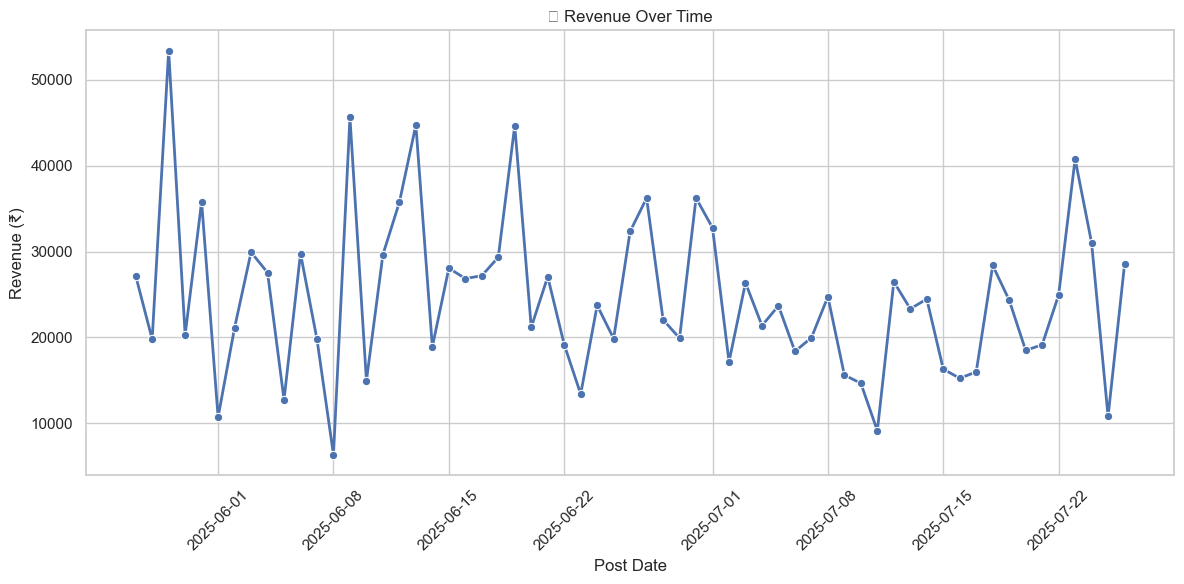

In [60]:
# Group by daily revenue
df_tracking['date'] = pd.to_datetime(df_tracking['date'])
daily_revenue = df_tracking.groupby('date')['revenue'].sum().reset_index()

# Plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_revenue, x='date', y='revenue', marker='o', linewidth=2)

# Formatting the x-axis for better readability
plt.xticks(rotation=45)
plt.title("📅 Revenue Over Time")
plt.xlabel("Post Date")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.grid(True)
plt.savefig('plot_8', dpi=300)
plt.show()

- Multiple noticeable peaks (around June 1, June 10, June 18, July 23). These spikes could correspond to:
a) High-performing influencer posts
b) Weekend campaigns
c) Product launches or flash sales
- Certain influencer posts have a disproportionate impact, investigating which influencer or campaigns caused these spikes would be really beneficial.
- Sudden Dips obviously indicate very low revenue days scattered across the month (INR 10K – INR 15K range). This could be due to: a) Weekday posting with low reach or b) Poor-performing influencers or c) Platform algorithm issues or low ad engagement

### Category vs Platform

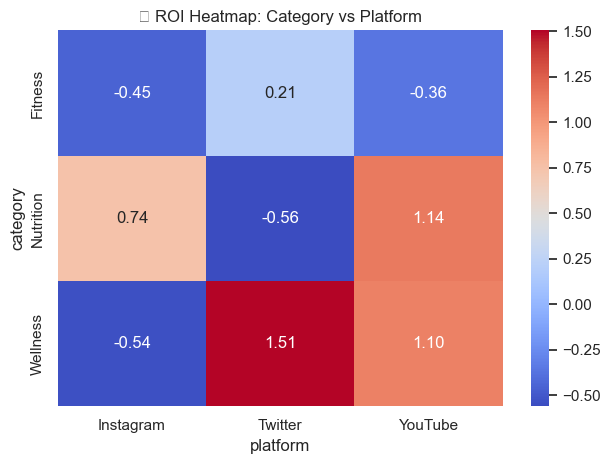

In [62]:
heatmap_data = performance.groupby(['category', 'platform'])['ROI'].mean().unstack()

sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("💥 ROI Heatmap: Category vs Platform")
plt.tight_layout()
plt.savefig('plot_9', dpi=300)
plt.show()


- Wellness + Twitter(Highest ROI-1.51, across all combinations). Likely a few powerful Twitter influencers driving excellent cost efficiency(low cost, high conversion)
- Hence, double down on Twitter for Wellness; possibly a hidden goldmine.
- Nutrition + YouTube(ROI-1.14). Great performance, aligns with what we’d expect from YouTube’s long-form content. Likely good for explainer videos, testimonials, product demos. It's advisable to continue investing in YouTube campaigns for Nutrition
- Wellness + YouTube (ROI = 1.10). YouTube showing up again, as a ROI positive channel. Maybe the best platform overall based on consistency alone.
- Highly recommend YouTube as a core platform for Wellness & Nutrition campaigns
- Instagram across all categories (ROI<0). All three categories are in negative ROI when promoted on Instagram
- Possible reasons might be High influencer fees, Low post conversion or Inconsistent audience engagement or all three
- Instagram is not cost-effective; especially for Fitness & Wellness. Re-evaluating influencer tiers and formats is highly recommended
- Nutrition + Twitter (ROI = -0.56). Despite Twitter’s success with Wellness, it fails with Nutrition. Could indicate a mismatch in audience-product fit. It is better to pause Nutrition efforts on Twitter or test new formats or creators.
- Reallocate budgets from Instagram to Twitter/YouTube for better ROIs.
- A/B test campaign content on Instagram before committing large budgets; try Reels, stories etc.